### 0. Dataset Load

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
null_values = ['?', '??', 'N/A', 'NA', 'nan', 'NaN', '-nan', '-NaN', 'null', '-']
x_train = pd.read_csv('./data/track1/features/x_train_normal.csv', na_values = null_values)
x_valid = pd.read_csv('./data/track1/features/x_valid_normal.csv', na_values = null_values)
x_test = pd.read_csv('./data/track1/features/x_test_normal.csv', na_values = null_values)
y_train = pd.read_csv('./data/track1/features/y_train_normal.csv', na_values = null_values)
y_valid = pd.read_csv('./data/track1/features/y_valid_normal.csv', na_values = null_values)
y_test = pd.read_csv('./data/track1/features/y_test_normal.csv', na_values = null_values)

In [3]:
x_train_features = x_train.drop(columns=['날짜', 'CODE', '종가'], inplace=False)
x_valid_features = x_valid.drop(columns=['날짜', 'CODE', '종가'], inplace=False)
x_test_features = x_test.drop(columns=['날짜', 'CODE', '종가'], inplace=False)
y_train_bool = y_train['Y'] <-2.0
y_valid_bool = y_valid['Y'] <-2.0
y_test_bool = y_test['Y'] <-2.0

### 1. Tree Base Simple Classifers
Tree 기반 분류 모델인 Decision Tree와 Random Forest 를 사용하여 재무데이터로 리스크 주식 분류 모델을 만들기

##### 1-1 Decision Tree Classifier

In [13]:
from sklearn import tree
import pickle
import joblib

decisionTree = tree.DecisionTreeClassifier(
    max_depth=15,
    min_samples_split=100,
    class_weight={True: 10, False: 1}
)
decisionTree.fit(x_train_features, y_train_bool)

joblib.dump(decisionTree, './test/models/decisionTree.pkl') 

['./test/models/decisionTree.pkl']

In [8]:
from sklearn.metrics import classification_report

y_pred = decisionTree.predict(x_train_features)
target_names = ['no risk', 'risk']
print(classification_report(y_train_bool, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     no risk       0.98      0.34      0.50     63391
        risk       0.22      0.96      0.36     12724

    accuracy                           0.44     76115
   macro avg       0.60      0.65      0.43     76115
weighted avg       0.85      0.44      0.48     76115



In [9]:
from sklearn.metrics import classification_report

y_pred = decisionTree.predict(x_valid_features)
target_names = ['no risk', 'risk']
print(classification_report(y_valid_bool, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     no risk       0.90      0.31      0.46     21052
        risk       0.20      0.83      0.32      4344

    accuracy                           0.40     25396
   macro avg       0.55      0.57      0.39     25396
weighted avg       0.78      0.40      0.44     25396



In [10]:
from sklearn.metrics import classification_report

y_pred = decisionTree.predict(x_test_features)
target_names = ['no risk', 'risk']
print(classification_report(y_test_bool, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     no risk       0.90      0.31      0.46     21040
        risk       0.20      0.83      0.32      4311

    accuracy                           0.40     25351
   macro avg       0.55      0.57      0.39     25351
weighted avg       0.78      0.40      0.43     25351



##### 1-2 Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200, 
    criterion='entropy', 
    min_samples_split = 100,
    bootstrap=True,
    max_depth=20,
    class_weight={True: 10, False: 1}
    )
rf.fit(x_train_features, y_train_bool)

joblib.dump(rf, './test/models/randomForest.pkl')

['./test/models/randomForest.pkl']

In [18]:
from sklearn.metrics import classification_report

y_pred = rf.predict(x_train_features)
target_names = ['no risk', 'risk']
print(classification_report(y_train_bool, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     no risk       0.97      0.40      0.57     63391
        risk       0.24      0.95      0.38     12724

    accuracy                           0.49     76115
   macro avg       0.61      0.67      0.48     76115
weighted avg       0.85      0.49      0.54     76115



In [19]:
y_pred = rf.predict(x_valid_features)
target_names = ['no risk', 'risk']

print(classification_report(y_valid_bool, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     no risk       0.91      0.38      0.53     21052
        risk       0.22      0.83      0.34      4344

    accuracy                           0.45     25396
   macro avg       0.56      0.60      0.44     25396
weighted avg       0.79      0.45      0.50     25396



In [21]:
y_pred = rf.predict(x_test_features)
target_names = ['no risk', 'risk']

print(classification_report(y_test_bool, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     no risk       0.91      0.38      0.54     21040
        risk       0.21      0.82      0.34      4311

    accuracy                           0.46     25351
   macro avg       0.56      0.60      0.44     25351
weighted avg       0.79      0.46      0.50     25351



### 2. Feature Selection
Forward, Backward 방식으로 Feature Selection을 시도 하였음

##### 2-1. RFECV
Backward 방식으로 simple classifier들에 대해 feature selection 진행

Index(['BPS', 'PBR', 'DIV', '거래량', '시가총액', '금리', '자산총계', '이익잉여금', '자본총계'], dtype='object')


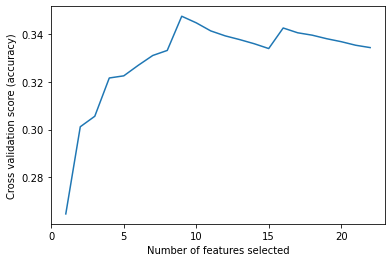

In [ ]:
from sklearn.feature_selection import RFECV
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt

x_train = pd.read_csv("features2021/x_train_normal.csv")            # 데이터 불러오기
y_train = pd.read_csv("features2021/y_train_normal.csv")

x_train.drop(['날짜', 'CODE'], axis=1, inplace=True)
y_train['Y'] = y_train['Y'].apply(lambda x:True if x<-2 else False)

rf = RandomForestClassifier(            # simple classifier에서 구성한 RandomForestClassifier 재사용
    n_estimators=200,
    bootstrap=True,
    max_depth=10,
    class_weight={True: 10, False: 1}
    )
cv = RepeatedStratifiedKFold()          # validation으로 RepeatedStratifiedKFold활용, n_splits=5(default), n_repeats=10(default)
selector = RFECV(rf, cv=cv)             # RFECV 진행
selector = selector.fit(x_train, y_train)

print(x_train.columns[selector.support_])   # 선택된 feature 리스트 출력
plt.figure()                                # feature 갯수와 CV accuracy에 대한 그래프
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

Index(['BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS', '거래량', '시가총액', '금리', '유동자산',
       '비유동자산', '자산총계', '유동부채', '비유동부채', '부채총계', '이익잉여금', '자본총계', '매출액',
       '영업이익', '법인세차감전 순이익', '당기순이익', '자본금'],
      dtype='object')


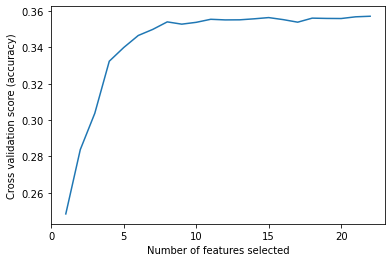

In [ ]:
from sklearn.feature_selection import RFECV
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

x_train = pd.read_csv("featuress/x_train_normal.csv")               # 데이터 불러오기
y_train = pd.read_csv("featuress/y_train_normal.csv")

x_train.drop(['날짜', 'CODE', '종가'], axis=1, inplace=True)
y_train['Y'] = y_train['Y'].apply(lambda x:True if x<-2 else False)

dt = DecisionTreeClassifier(max_depth=15,               # simple classifier에서 구성한 DecisionTreeClassifier 재사용
                            min_samples_split=100,
                            class_weight={True:10, False:1})
cv = RepeatedStratifiedKFold()                          # 위와 같이 RepeatedStratifiedKFold 선언
selector = RFECV(dt, cv=cv)
selector = selector.fit(x_train, np.ravel(y_train))

print(x_train.columns[selector.support_])               # 선택된 feature 리스트 및 그래프 출력
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

##### 2-2. Sequential Feature Selector
forward 방식으로 feature selection 진행

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

x_train = pd.read_csv("featuress/x_train_normal.csv")       # 데이터 로드
y_train = pd.read_csv("featuress/y_train_normal.csv")

x_train.drop(['날짜', 'CODE', '종가'], axis=1, inplace=True)
y_train['Y'] = y_train['Y'].apply(lambda x:True if x<-2 else False)

dt = DecisionTreeClassifier(max_depth=15,                   # simple classifier 중 실행시간이 짧은 DecisionTreeClassifier 선택
                            min_samples_split=100,
                            class_weight={True:10, False:1})

cv = RepeatedStratifiedKFold()
sfs = SequentialFeatureSelector(dt,                         # SequentialFeatureSelector 선언, 목표 feature 선택수는 9개, forward 방식으로 cv와 함께 진행
                                n_features_to_select=9,
                                direction='forward',
                                cv=cv)
sfs.fit(x_train, np.ravel(y_train))

print(x_train.columns[sfs.get_support()])                   # 선택된 feature 확인

Index(['BPS', 'DIV', '거래량', '금리', '비유동자산', '자산총계', '부채총계', '법인세차감전 순이익',
       '당기순이익'],
      dtype='object')


### 3. LightGBM and Weak Bagging
gradient boosting 기반의 tree classifier인 lightGBM 모델을 사용하여 Risk 종목 분류를 하였습니다
LightGBM 모델들을 Feature selection 결과를 기반으로 Bagging의 아이디어를 활용하여 앙상블 하는 모델을 만들었습니다

##### 3-1 Light GBM Model

In [24]:
! pip install lightgbm

In [92]:
import lightgbm as LightGBM

lgbm = LightGBM.LGBMClassifier(early_stopping_rounds=100,
                               reg_lambda = 0.25, 
                               n_estimators=600,
                               max_depth = 20,
                               min_data_in_leaf = 100,
                               class_weight={True: 10, False: 1},
                               learning_rate= 0.1,
                               objective='binary'
                              ) 

evals = [(x_train_features, y_train_bool)]
lgbm.fit(x_train_features, y_train_bool, eval_metric='logloss', eval_set=evals)
y_pred = lgbm.predict(x_train_features)

joblib.dump(lgbm, './test/models/LightGBM.pkl')

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[1]	training's binary_logloss: 0.628971
[2]	training's binary_logloss: 0.623177
[3]	training's binary_logloss: 0.61815
[4]	training's binary_logloss: 0.613883
[5]	training's binary_logloss: 0.610448
[6]	training's binary_logloss: 0.607506
[7]	training's binary_logloss: 0.604738
[8]	training's binary_logloss: 0.602413
[9]	training's binary_logloss: 0.600206
[10]	training's binary_logloss: 0.598273
[11]	training's binary_logloss: 0.596473
[12]	training's binary_logloss: 0.594786
[13]	training's binary_logloss: 0.593277
[14]	training's binary_logloss: 0.591786
[15]	training's binary_logloss: 0.590473
[16]	training's binary_logloss: 0.589261
[17]	training's binary_logloss: 0.588205
[18]	training's binary_logloss: 0.587172
[19]	traini

['./test/models/LightGBM.pkl']

In [93]:
from sklearn.metrics import classification_report

y = lgbm.predict(x_train_features)
target_names = ['no risk', 'risk']

print(classification_report(y_train_bool, y, target_names=target_names))

              precision    recall  f1-score   support

     no risk       0.99      0.43      0.60     63391
        risk       0.26      0.97      0.40     12724

    accuracy                           0.52     76115
   macro avg       0.62      0.70      0.50     76115
weighted avg       0.86      0.52      0.57     76115



In [94]:
from sklearn.metrics import classification_report

y = lgbm.predict(x_valid_features)
target_names = ['no risk', 'risk']

print(classification_report(y_valid_bool, y, target_names=target_names))

              precision    recall  f1-score   support

     no risk       0.91      0.40      0.55     21052
        risk       0.22      0.81      0.34      4344

    accuracy                           0.47     25396
   macro avg       0.56      0.61      0.45     25396
weighted avg       0.79      0.47      0.52     25396



##### 3-2 Light GBM and Ensembles
Light GBM 모델을 feature selection feature set 기반으로 앙상블하였습니다

In [111]:
# light gbm 앙상블을 위해 feature set을 생성하는 코드
rfecv_feature_list = ['BPS', 'PBR', 'DIV', '거래량', '시가총액', '금리', '자산총계', '이익잉여금', '자본총계']
sfs_feature_list = ['BPS', 'DIV', '거래량', '금리', '비유동자산', '자산총계', '부채총계', '법인세차감전 순이익', '당기순이익']


def make_feature_set(x) :
    x_whole = x
    x_rfecv = x[rfecv_feature_list]
    x_sfs = x[sfs_feature_list]

    return x_whole, x_rfecv, x_sfs


x_whole, x_rfecv, x_sfs= make_feature_set(x_train)

In [119]:
import lightgbm as LightGBM

feature_set = []
feature_set = make_feature_set(x_train_features)
model = []

## train
i=0
for x in feature_set :
    lgbm = LightGBM.LGBMClassifier(early_stopping_rounds=100,
                               reg_lambda = 0.25, 
                               n_estimators=600,
                               max_depth = 50,
                               min_data_in_leaf = 50,
                               class_weight={True: 10, False: 1},
                               learning_rate= 0.1
                              ) 
    evals = [(x, y_train_bool)]
    lgbm.fit(x, y_train_bool, eval_metric='logloss', eval_set=evals)
    joblib.dump(lgbm, './test/models/lgbm_ensembles' + str(i) + '.pkl')
    i = i+1

## prediction
def predict_ensemble_model(x_) :
    feature_set = make_feature_set(x_)
    y_pred = []
    i = 0
    for x in feature_set :
        pred = model[i].predict(x)
        y_pred.append(pred)
        i = i+1

    y_pred_sum = y_pred[0] | (y_pred[1] & y_pred[2])# & y_pred[3] & y_pred[4])
    return y_pred_sum


[1]	training's binary_logloss: 0.628963
[2]	training's binary_logloss: 0.623169
[3]	training's binary_logloss: 0.618132
[4]	training's binary_logloss: 0.613868
[5]	training's binary_logloss: 0.610407
[6]	training's binary_logloss: 0.607459
[7]	training's binary_logloss: 0.604669
[8]	training's binary_logloss: 0.602451
[9]	training's binary_logloss: 0.600126
[10]	training's binary_logloss: 0.598127
[11]	training's binary_logloss: 0.596193
[12]	training's binary_logloss: 0.594546
[13]	training's binary_logloss: 0.593102
[14]	training's binary_logloss: 0.591732
[15]	training's binary_logloss: 0.590413
[16]	training's binary_logloss: 0.589211
[17]	training's binary_logloss: 0.588091
[18]	training's binary_logloss: 0.587018
[19]	training's binary_logloss: 0.585988
[20]	training's binary_logloss: 0.585031
[21]	training's binary_logloss: 0.584051
[22]	training's binary_logloss: 0.58326
[23]	training's binary_logloss: 0.582493
[24]	training's binary_logloss: 0.581635
[25]	training's binary_log

In [113]:
from sklearn.metrics import classification_report

y = predict_ensemble_model(x_train_features)
target_names = ['no risk', 'risk']

print(classification_report(y_train_bool, y, target_names=target_names))

              precision    recall  f1-score   support

     no risk       0.99      0.40      0.57     63391
        risk       0.25      0.99      0.40     12724

    accuracy                           0.50     76115
   macro avg       0.62      0.69      0.49     76115
weighted avg       0.87      0.50      0.55     76115



In [114]:
from sklearn.metrics import classification_report

y = predict_ensemble_model(x_valid_features)
target_names = ['no risk', 'risk']

print(classification_report(y_valid_bool, y, target_names=target_names))

              precision    recall  f1-score   support

     no risk       0.92      0.37      0.53     21052
        risk       0.21      0.84      0.34      4344

    accuracy                           0.45     25396
   macro avg       0.57      0.60      0.43     25396
weighted avg       0.80      0.45      0.50     25396



In [116]:
from sklearn.metrics import classification_report

y = predict_ensemble_model(x_test_features)
target_names = ['no risk', 'risk']

print(classification_report(y_test_bool, y, target_names=target_names))

              precision    recall  f1-score   support

     no risk       0.91      0.37      0.52     21040
        risk       0.21      0.82      0.34      4311

    accuracy                           0.45     25351
   macro avg       0.56      0.60      0.43     25351
weighted avg       0.79      0.45      0.49     25351



### 4. MLP Base Models
multi-layer perceptron 기반의 classifier를 만들었고
encoder-decoder로 데이터를 임베딩하여 거래량(시계열) 데이터 예측에 사용 할 수 있도록 하였습니다.

##### 4-0 Data loader 
pytorch로 mlp classifier를 구현하였는데 이 때 필요한 데이터 로더를 구현하였습니다

In [122]:
import torch
from torch.utils.data import Dataset, DataLoader

class StockDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x.iloc[idx])
        y = torch.FloatTensor(self.y.iloc[idx])
        return x, y

##### 4-1 Multi-Layer Perceptron Classifier

In [134]:
import torch
import torch.nn as nn
from torch import optim

class Simple_MLP_Net(nn.Module):
    def __init__(self):
        super(Simple_MLP_Net, self).__init__()

        self.layer = nn.Sequential(
            nn.Linear(22, 128, bias=True),
            nn.ReLU(),
            nn.Linear(128, 128, bias=True),
            nn.ReLU(),
            nn.Linear(128, 128, bias=True),
            nn.ReLU(),
            nn.Linear(128, 128, bias=True),
            nn.ReLU(),
            nn.Linear(128, 64, bias=True),
            nn.ReLU(),
            nn.Linear(64, 32, bias=True),
            nn.ReLU(),
        )
        self.output_layer = nn.Sequential(
            nn.Linear(32, 1, bias=True),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.layer(x)
        x = self.output_layer(x)
        return x

    def embedding_output(self, x):
        x = self.layer(x)
        return x


In [ ]:
y_train_int = pd.DataFrame()
y_train_int['y'] = y_train_bool.astype(int)
train_dataset = StockDataset(x_train_features, y_train_int)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = Simple_MLP_Net().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)


for epoch in range(100):
    cost = 0.0
    model.train()
    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch : {epoch+1:4d}, Cost : {cost:.3f}")
        torch.save(model.state_dict(), './history/mlp_net_checkpoint' + str(epoch) +  '.pth')

Epoch :   10, Cost : 0.429
Epoch :   20, Cost : 0.425
Epoch :   30, Cost : 0.421
Epoch :   40, Cost : 0.417
Epoch :   50, Cost : 0.414
Epoch :   60, Cost : 0.410


In [141]:
#from torcheval.metrics import BinaryAccuracy
from torchmetrics.classification import BinaryAccuracy


y_train_int = pd.DataFrame()
y_train_int['y'] = y_train_bool.astype(int)
train_dataset = StockDataset(x_train_features, y_train_int)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

y_valid_int = pd.DataFrame()
y_valid_int['y'] = y_valid_bool.astype(int)
valid_dataset = StockDataset(x_valid_features, y_valid_int)
valid_dataloader = DataLoader(valid_dataset, batch_size=128, shuffle=True, drop_last=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = Simple_MLP_Net().to(device)

PATH = './history/mlp_net_checkpoint19.pth'
checkpoint = torch.load(PATH, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)

criterion = nn.BCELoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)

model.eval()
total_acc = 0
total_loss = 0
num_batch = 0
for x, y in valid_dataloader:
    with torch.no_grad():
        x = x.to(device)
        y = y.to(device)

        outputs = model(x)
        #pred = (outputs > 0.5).float
        loss = criterion(outputs, y)
        metric = BinaryAccuracy().to(device)
        metric(outputs, y)
        acc = metric.compute()
        total_acc += acc
        total_loss += loss.cpu().item()
        num_batch = num_batch + 1
        
total_acc = total_acc/(num_batch) 
total_loss = total_loss/(num_batch)

print("acc : ", total_acc, "loss : " , total_loss)

acc :  tensor(0.8290) loss :  0.43288516200552085


##### 4-2 Encoder Decoder
Multi-Layer Perceptron 네트워크로 재무데이터를 22 차원에서 16차원으로 줄이는 encoder와 다시 embedding을 22차원으로 늘리는 decoder를 학습켰습니다. 임베딩은 이후 시계열 데이터 예측 모델 (LSTM)에서 feature로 사용하였습니다.

In [130]:
import torch
import torch.nn as nn
from torch import optim

class Encoder_Decoder(nn.Module):
    def __init__(self):
        super(Encoder_Decoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(22, 128, bias=True),
            nn.ReLU(),
            nn.Linear(128, 64, bias=True),
            nn.ReLU(),
            nn.Linear(64, 32, bias=True),
            nn.ReLU(),
            nn.Linear(32, 16, bias=True),
            nn.Sigmoid(),
            
        )

        self.decoder = nn.Sequential(
            nn.Linear(16, 32, bias=True),
            nn.ReLU(),
            nn.Linear(32, 64, bias=True),
            nn.ReLU(),
            nn.Linear(64, 128, bias=True),
            nn.ReLU(),
            nn.Linear(128, 22, bias=True),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
    def calcEncoding(self, x):
        return self.encoder(x)

In [ ]:
### 아래 결과는 150 epoch 후 한번 돌린 후의 결과입니다
train_dataset = StockDataset(x_train_features, x_train_features)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = Encoder_Decoder().to(device)

PATH = './history/embedding_net5_150_checkpoint.pth'
checkpoint = torch.load(PATH, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)

criterion = nn.MSELoss(reduction='mean').to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)

for epoch in range(1):
    cost = 0.0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        cost += loss

    cost = cost / len(train_dataloader)

    if (epoch) % 10 == 0:
        print(f"Epoch : {epoch+1:4d}, Cost : {cost:.3f}")
        #torch.save(model.state_dict(), '/content/drive/MyDrive/data/embedding_net5_' + str(epoch) + '_checkpoint.pth')

#torch.save(model.state_dict(), '/content/drive/MyDrive/data/embedding_net5_100_checkpoint.pth')



Epoch :    1, Cost : 0.003


In [149]:

valid_dataset = StockDataset(x_valid_features, x_valid_features)
valid_dataloader = DataLoader(valid_dataset, batch_size=128, shuffle=True, drop_last=True)

y_train_int = pd.DataFrame()
y_train_int['y'] = y_train_bool.astype(int)
train_dataset = StockDataset(x_train_features, y_train_int)
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = Encoder_Decoder().to(device)

PATH = './history/embedding_net5_150_checkpoint.pth'
checkpoint = torch.load(PATH, map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)

criterion = nn.MSELoss(reduction='mean').to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)


#model.eval()
total_loss = 0
num_batch = 0
for x, y in valid_dataloader:
    with torch.no_grad():
        x = x.to(device)
        y = y.to(device)

        output = model(x)
        loss = criterion(output, y)

        total_loss += loss
        
total_loss = total_loss / len(valid_dataloader)
print("validation loss : " + str(float(total_loss)))


validation loss : 0.0022947683464735746


### 5. Timeseries Analysis With LSTM
거래량 데이터를 LSTM 모델을 이용하여 시계열 분석을 하였습니다.

##### 5-1. Convert data to time series and save data
기존 데이터를 시계열 데이터로 변환 후 저장

In [ ]:
import pandas as pd

data = pd.read_csv("modified_stock_trade_volume.csv")
column = ['기관합계', '기타법인', '개인', '외국인합계', '전체']          # 거래량 정보에 담긴 feature들

data['code'] = data['code'].apply(lambda x : "0" *(6-len(str(x))) + str(x))
data.set_index('날짜', inplace=True)

codes = set(data['code'])

for code in codes:
  for col in column:
    a = pd.DataFrame()
    for i in range(10):                                             # 데이터프레임을 shift하여 10일간의 데이터를 하나로 묶음
      a['shift'+str(i)] = data[data['code']==code][col].shift(i)    # 각 feature마다 10일씩 shift하여 1~10일, 2~11일, ...의 데이터가 하나의 데이터프레임을 이루게 함
    a['code'] = data[data['code']==code]['code']
    a['y'] = data[data['code']==code]['Y']
    a = a.dropna()                                                  # 결측치 제거
    a.to_csv("lstm/" + str(code) + str(col) + '_info.csv')          # 기업별, feature별로 10일단위 시계열 데이터에 대한 데이터프레임 저장

##### 5-2. Load data, convert into 3D data, and fit model
저장된 각각의 데이터를 불러와 3차원 데이터 형성 후 학습

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

column = ['기관합계', '기타법인', '개인', '외국인합계', '전체']
data = pd.read_csv("modified_stock_trade_volume.csv")
codes = set(data['code'].apply(lambda x : "0" *(6-len(str(x))) + str(x)))
log_df = pd.DataFrame(columns=['loss', 'acc', 'val_loss', 'val_acc'])
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

for code in codes:
  info = list()         # feature들의 임시 저장 공간
  y = list()            # y값의 임시 저장 공간
  for col in column:
    df = pd.read_csv("lstm/" + code + str(col) + '_info.csv')   # 위에서 저장한 데이터 로드
    df['y'] = df['y'] < -2
    y.append(np.array(df['y']))                                 # y값 저장
    df.drop(['날짜', 'code', 'y'], inplace=True, axis=1)         # 데이터에서 y값 및 인덱스값 분리
    info.append(df)                                             # x값 저장

  x = [[[info[i].iloc[k][j] for i in range(len(info))] for j in range(10)] for k in range(len(info[0]))]    # 데이터의 형태를 학습을 위해 변형
  x = np.array(x)                                                                                           # (학습데이터수 * window * feature수)
  x_train = x[:int(len(x)*0.8)]         # 전체 기간 중 앞부분 80%를 train에 활용, 나머지는 test
  x_test = x[int(len(x)*0.8):]
  y_train = y[0][:int(len(y[0])*0.8)]
  y_test = y[0][int(len(y[0])*0.8):]

  K.clear_session()
  model = Sequential()                  # 간단한 LSTM 모델 형성
  model.add(LSTM(20, input_shape=(10, 5)))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  model.summary()
  if code != codes[0]:
    model.load_weights('v')             # 반복적인 학습을 위해 학습된 모델의 weight 저장 및 가져오기

  history = model.fit(x_train, y_train, epochs=50, batch_size=30, verbose=1, callbacks=early_stop, validation_data = (x_test, y_test))
  log_df = pd.concat([log_df, pd.DataFrame(history.history)]) # log_df에 학습 과정 (acc, loss, val_acc, val_loss 저장)
  model.save_weights('v')               # 학습한 모델의 weight 저장

print(log_df)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                2080      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,301
Trainable params: 2,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
36/36 [==============================] - 2s 12ms/step - loss: 1.7510 - acc: 0.8099 - val_loss: 1.4329 - val_acc: 0.8625
Epoch 2/50
36/36 [==============================] - 0s 3ms/step - loss: 1.8411 - acc: 0.8192 - val_loss: 1.5754 - val_acc: 0.8550
Epoch 2: early stopping
Model: "sequential"
_____________

##### 5-3 Result
log_df에 저장한 값들을 바탕으로 학습 그래프 생성

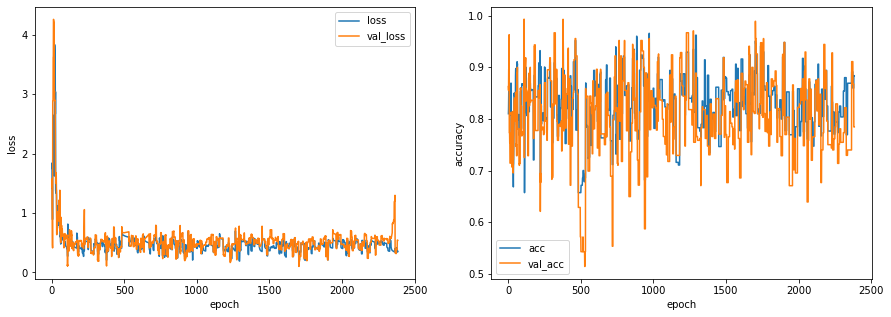

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(list(log_df['loss']), label='loss')
plt.plot(list(log_df['val_loss']), label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
plt.plot(list(log_df['acc']), label='acc')
plt.plot(list(log_df['val_acc']), label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

## 6. LSTM for stock volume with financial statement embeddings
주가지표, 재무제표의 임베딩을 거래정보와 함께 feature로 사용해 LSTM 학습

### 3-1. Convert data to 3D time series data
데이터를 시계열 데이터 형태로 변환 후 저장

In [ ]:
import pandas as pd

trade_data = pd.read_csv("modified_stock_trade_volume.csv")
train = pd.read_csv("embedding/train_embedding.csv")
test = pd.read_csv("embedding/test_embedding.csv")
valid = pd.read_csv("embedding/validation_embedding.csv")

trade_data['code'] = trade_data['code'].apply(lambda x : "0" *(6-len(str(x))) + str(x))
data = pd.concat([train, test, valid])                          # 임베딩 전체 데이터 병합
data['code'] = data['CODE'].apply(lambda x : str(x)[-6:])
data.drop(['Unnamed: 0', 'CODE'], axis=1, inplace=True)

data = pd.merge(trade_data, data)                               # 병합된 임베딩 데이터와 기존 거래정보 데이터 병합
data.set_index('날짜', inplace=True)
data.sort_index(inplace=True)                                   # index를 날짜로 설정 후 날짜순으로 정렬해 시계열 데이터 생성 준비

codes = set(data['code'])                                       # 데이터의 기업 코드 추출
column = ['기관합계', '기타법인', '개인', '외국인합계', '전체', 'embedding1', 'embedding2', 'embedding3', 'embedding4', 'embedding5', 'embedding6', 'embedding7', 'embedding8', 'embedding9', 'embedding10', 'embedding11', 'embedding12', 'embedding13', 'embedding14', 'embedding15']      # 현재 20개 feature

for code in codes:
  for col in column:
    a = pd.DataFrame()
    for i in range(10):
      a['shift'+str(i)] = data[data['code']==code][col].shift(i)    # 2-1에서 했던 같은 방식으로 시계열 데이터 생성
    a['code'] = data[data['code']==code]['code']
    a['y'] = data[data['code']==code]['Y']
    a = a.dropna()
    a.to_csv("lstm2/" + str(code) + str(col) + '_info.csv')         # 기업 별, 특성 별로 저장

In [ ]:
import numpy as np
import pandas as pd

codes = list(set(data['code']))
column = ['기관합계', '기타법인', '개인', '외국인합계', '전체', 'embedding1', 'embedding2', 'embedding3', 'embedding4', 'embedding5',
          'embedding6', 'embedding7', 'embedding8', 'embedding9', 'embedding10', 'embedding11', 'embedding12',
          'embedding13', 'embedding14', 'embedding15']      # 학습에 쓰일 feature 리스트
train_data = list()

for code in codes:          # train_data 생성 부분
    info = list()
    y = list()
    for col in column:      # 기업별로 각 feature에 대해 info에 x값(feature), y에 y값을 모음
        df = pd.read_csv("lstm2/" + code + str(col) + '_info.csv')  # 위에서 저장한 데이터를 불러옴
        df['y'] = df['y'] < -2
        y.append(np.array(df['y']))                                 # y값 추출
        df.drop(['날짜', 'code', 'y'], inplace=True, axis=1)         # x값 분리
        info.append(df)

    x = [[[info[i].iloc[k][j] for i in range(len(info))] for j in range(10)] for k in range(len(info[0]))]# 학습에 필요한(데이터수)*(window)*(feature수)형태로 변환
    x = np.array(x)
    train_data.append((x, y[0]))        #기업별로 train_data에 학습용 데이터 저장

In [ ]:
x_valid = list()
y_valid = list()

for x, y in train_data:
  x_valid.append(x[int(len(x)*0.75):])  # valid용 데이터 우선분리, valid는 전체 기간 중 마지막 25%.
  y_valid.append(y[int(len(y)*0.75):])  # train : test : valid = 50 : 25 : 25

x = np.array(x_valid)
y = np.array(y_valid)

np.save('x_valid', x)       # valid용 데이터는 3차원 넘파이배열 형태로 따로 저장
np.save('y_valid', y)

### 3-2-1. LSTM with huge weight

In [ ]:
import pandas as pd
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

log_df = pd.DataFrame(columns=['loss', 'acc', 'val_loss', 'val_acc'])   # 학습 진행과정을 담을 데이터프레임
epoch = 5       # 총 실행횟수
isFirst = True

x_valid = list()
y_valid = list()

for i in range(epoch):
  for x, y in train_data:           # 각 에포크마다 train_data안의 모든 기업에 대해 1회 학습을 진행함
    x_train = x[:int(len(x)*0.5)]   # train : test = 50 : 25, valid는 미리 위에서 따로 저장
    x_test = x[int(len(x)*0.5):int(len(x)*0.75)]
    y_train = y[:int(len(y)*0.5)]
    y_test = y[int(len(y)*0.5):int(len(y)*0.75)]

    K.clear_session()
    model = Sequential()                        # 모델은 20개의 output을 가지는 LSTM 위에 hidden layer로 2개의 dense층, 마지막으로 하나의 output을 가짐
    model.add(LSTM(20, input_shape=(10, 20)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))   # 마지막 층은 classification값을 내놓아야 하므로 sigmoid를 활성함수로 지정
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc']) # optimizer로 adam활용, loss는 엔트로피 활용
    if not isFirst:
      model.load_weights('v2')                  # 모델의 가중치를 학습마다 저장 후 불러와 연속적인 학습을 가능하게 함
    else:
      isFirst = False

    history = model.fit(x_train, y_train, epochs=1, batch_size=30, verbose=1, validation_data = (x_test, y_test), class_weight={True:10, False:1})
    log_df = pd.concat([log_df, pd.DataFrame(history.history)])  # class weight을 강하게 적용시켜 상대적으로 적은 인스턴스를 가진 true를 강화
    model.save_weights('v2')

8/8 [==============================] - 2s 43ms/step - loss: 1.7095 - acc: 0.2085 - val_loss: 0.9910 - val_acc: 0.1887


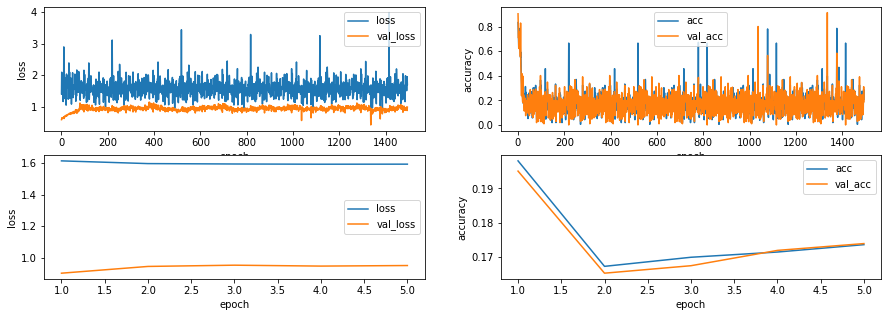

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(221)                                        # 전체 학습에 대한 히스토리를 그래프로 그림
plt.plot(list(log_df['loss']), label='loss')            # x축은 학습 진행정도, y축은 각각의 label
plt.plot(list(log_df['val_loss']), label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(222)
plt.plot(list(log_df['acc']), label='acc')
plt.plot(list(log_df['val_acc']), label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

log_df.to_csv("lstm2/log_for_test.csv", index=False)

l1 = log_df[:299]       # 한 에포크는 299개 기업을 대상으로 돌아가므로 299개 실행마다 분할함
l2 = log_df[299:598]
l3 = log_df[598:897]
l4 = log_df[897:1196]
l5 = log_df[1196:]

plt.subplot(223)                # 에포크 당 평균적인 지표를 환산하여 그래프로 나타냄
plt.plot([1,2,3,4,5], [l1['loss'].mean(), l2['loss'].mean(), l3['loss'].mean(), l4['loss'].mean(), l5['loss'].mean()], label='loss')
plt.plot([1,2,3,4,5], [l1['val_loss'].mean(), l2['val_loss'].mean(), l3['val_loss'].mean(), l4['val_loss'].mean(), l5['val_loss'].mean()], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(224)
plt.plot([1,2,3,4,5], [l1['acc'].mean(), l2['acc'].mean(), l3['acc'].mean(), l4['acc'].mean(), l5['acc'].mean()], label='acc')
plt.plot([1,2,3,4,5], [l1['val_acc'].mean(), l2['val_acc'].mean(), l3['val_acc'].mean(), l4['val_acc'].mean(), l5['val_acc'].mean()], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

### 3-2-2 LSTM for lower weight

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

log_df = pd.DataFrame(columns=['loss', 'acc', 'val_loss', 'val_acc'])       # 전체 진행은 3-1과 동일함
epoch = 5
isFirst = True

x_valid = list()
y_valid = list()

for i in range(epoch):
  for x, y in train_data:
    x_train = x[:int(len(x)*0.5)]
    x_test = x[int(len(x)*0.5):int(len(x)*0.75)]
    y_train = y[:int(len(y)*0.5)]
    y_test = y[int(len(y)*0.5):int(len(y)*0.75)]

    K.clear_session()
    model = Sequential()
    model.add(LSTM(20, input_shape=(10, 20)))               # 위의 실행에서 모델이 충분히 복잡하지 못하다 판단, 모델을 조금 더 복잡하게 만듦
    model.add(Dense(128, activation='relu'))                # hidden layer에 dense층을 여러개 삽입, 마지막 층은 sigmoid 이용한 한개의 dense층
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    if not isFirst:
      model.load_weights('model_weight/v3')
    else:
      isFirst = False

    history = model.fit(x_train, y_train, epochs=1, batch_size=30, verbose=1, validation_data = (x_test, y_test), class_weight={True:0.8, False:0.2})
    log_df = pd.concat([log_df, pd.DataFrame(history.history)])
    model.save_weights('model_weight/v3')

8/8 [==============================] - 2s 47ms/step - loss: 0.2206 - acc: 0.8057 - val_loss: 0.6298 - val_acc: 0.8113


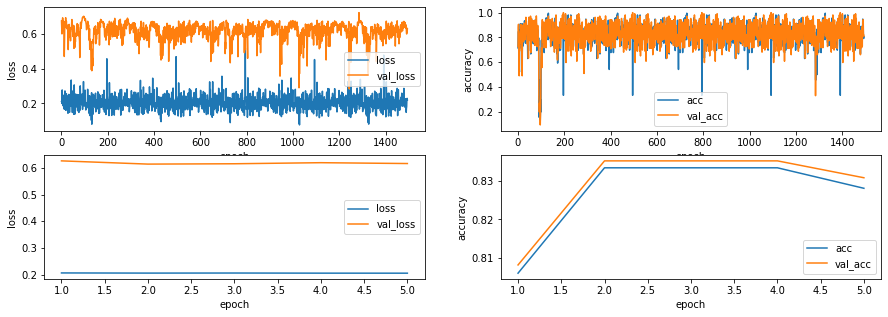

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(221)                                        # 3-1과 동일한 방식의 그래프 그리기
plt.plot(list(log_df['loss']), label='loss')
plt.plot(list(log_df['val_loss']), label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(222)
plt.plot(list(log_df['acc']), label='acc')
plt.plot(list(log_df['val_acc']), label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

log_df.to_csv("lstm2/log_for_test.csv", index=False)

l1 = log_df[:299]
l2 = log_df[299:598]
l3 = log_df[598:897]
l4 = log_df[897:1196]
l5 = log_df[1196:]

plt.subplot(223)
plt.plot([1,2,3,4,5], [l1['loss'].mean(), l2['loss'].mean(), l3['loss'].mean(), l4['loss'].mean(), l5['loss'].mean()], label='loss')
plt.plot([1,2,3,4,5], [l1['val_loss'].mean(), l2['val_loss'].mean(), l3['val_loss'].mean(), l4['val_loss'].mean(), l5['val_loss'].mean()], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(224)
plt.plot([1,2,3,4,5], [l1['acc'].mean(), l2['acc'].mean(), l3['acc'].mean(), l4['acc'].mean(), l5['acc'].mean()], label='acc')
plt.plot([1,2,3,4,5], [l1['val_acc'].mean(), l2['val_acc'].mean(), l3['val_acc'].mean(), l4['val_acc'].mean(), l5['val_acc'].mean()], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

### 3-3. Result Analysis

In [ ]:
import numpy as np
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

x = np.load('x_valid.npy', allow_pickle=True)       # valid 부분
y = np.load('y_valid.npy', allow_pickle=True)

K.clear_session()
model = Sequential()
model.add(LSTM(20, input_shape=(10, 20)))           # 3-2모델을 가져옴
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()
model.load_weights('model_weights/v3')              # 3-2에서 학습한 가중치 복구
model.save_weights('model_weights/v3')

results = {'TP' : 0, 'TN' : 0, 'FP' : 0, 'FN' : 0}

for i in range(len(y)):
    predicts = model.predict(x[i], verbose=0)
    predicts = [True if x>0.5 else False for [x] in predicts]
    for j in range(len(predicts)):
        if y[i][j] and predicts[j]:
            results['TP'] += 1      # TP = true positive
        elif y[i][j]:
            results['FN'] += 1      # FN = false negative
        elif predicts[j]:
            results['FP'] += 1      # FP = false positive
        else:
            results['TN'] += 1      # TN = true negative

print('\nRESULTS')              # 출력부분, precision / recall / f1 score / support 직접 계산
print('True Positive\tFalse Negative\tFalse Positive\tTrue Negative')
print('{}\t\t\t\t{}\t\t\t\t{}\t\t\t\t{}'.format(results['TP'], results['FN'], results['FP'],  results['TN']))
print('------------------------------------------------------------')
print('\t\t precision\t\trecall\t\t\tf1 score\t\tsupport')
precision = results['TP'] / (results['TP'] + results['FP'])
recall = results['TP'] / (results['TP'] + results['FN'])
print('risk    :{:.2f}\t\t\t{:.2f}\t\t\t{:.2f}\t\t\t{}'.format(precision, recall, 2*precision*recall / (precision+recall), results['TP'] + results['FN']))
precision = results['TN'] / (results['TN'] + results['FN'])
recall = results['TN'] / (results['TN'] + results['FP'])
print('no risk :{:.2f}\t\t\t{:.2f}\t\t\t{:.2f}\t\t\t{}'.format(precision, recall, 2*precision*recall / (precision+recall), results['FP'] + results['TN']))
print('accuracy: {}'.format((results['TP'] + results['TN']) / (results['TP'] + results['TN'] + results['FP'] + results['FN'])))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 128)               2688      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,849
Trainable params: 16,849
Non-traina